<a href="https://colab.research.google.com/github/ipavlopoulos/toxic_spans/blob/master/ToxicSpans_SemEval21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the data and the code

In [1]:
from ast import literal_eval
import pandas as pd
import random

In [2]:
from evaluation.semeval2021 import f1

In [3]:
tsd = pd.read_csv("data/tsd_test.csv") 
tsd.spans = tsd.spans.apply(literal_eval)
tsd.head(1)

,spans,text
0,"[84, 85, 86, 87, 88, 89, 90, 91, 133, 134, 135...",That's right. They are not normal. And I am st...


In [5]:
from scipy.stats import sem

t_probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
t_stats = [10, 20, 30, 40, 50, 60]
scores = pd.DataFrame(columns=['Term frequency', 'Toxicity ratio', 'F1'])
for i in t_stats:
    for j in t_probs:
        tsd["random_predictions"] = pd.read_csv('counts_probs/' + str(i) + '_' + str(j) + '_' + 'spans-pred.txt', 
                                                        sep='\t', engine='python', 
                                                        header=None, names=['Name'])
        tsd["f1_scores"] = tsd.apply(lambda row: f1(literal_eval(row.random_predictions), row.spans), axis=1)
#         print(f"F1 = {tsd.f1_scores.mean():.4f} ± {sem(tsd.f1_scores):.4f}, {i, j}")
        scores = scores.append(pd.Series([int(i), j, round(tsd.f1_scores.mean(), 2)], index=scores.columns), ignore_index=True)
scores['Term frequency'] = scores['Term frequency'].astype(int)
scores

,Term frequency,Toxicity ratio,F1
0,10,0.0,0.39
1,10,0.1,0.54
2,10,0.2,0.58
3,10,0.3,0.58
4,10,0.4,0.58
5,10,0.5,0.63
6,10,0.6,0.61
7,10,0.7,0.54
8,10,0.8,0.34
9,10,0.9,0.20


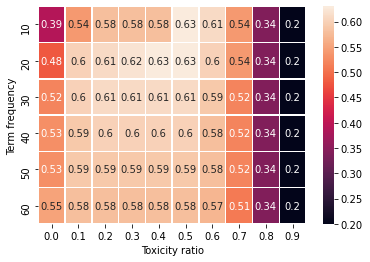

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
score = scores.pivot("Term frequency", "Toxicity ratio", "F1")
ax = sns.heatmap(score, annot=True, linewidths=.5)
plt.savefig('heatmap.png', dpi=200)

In [8]:
import os
from scipy.stats import sem

def charList_to_intList(line):
	line = line.split('\t')
	line = line[1][1:-1].split(' ')
	span = []
	for elem in line:
		if len(elem) >= 2:
			span.append(int(elem[:-1]))
	return span

def other(bag_of_words, pred_other):
    charBert = open(pred_other, 'r').readlines()
    with open('spans-pred.txt', 'w') as combined_preds:
        for i, line in enumerate(bag_of_words):
            spans = []
            span1 = charList_to_intList(line)
            span2 = charList_to_intList(charBert[i])
            for elem in span1:
                spans.append(elem)
            for elem in span2:
                spans.append(elem)
            spans = sorted(set(spans))
            combined_preds.write(str(i) + '\t' + str(spans) + '\n')

t_probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
t_stats = [10, 20, 30, 40, 50, 60]
scores = pd.DataFrame(columns=['Term frequency', 'Toxicity ratio', 'F1'])
for i in t_stats:
    for j in t_probs:
        pred_65 = 'bow/spans-pred_charbert.txt'
        bag_of_words = open(pred_65, 'r')
        pred_other = 'counts_probs/' + str(i) + '_' + str(j) + '_' + 'spans-pred.txt'
        other(bag_of_words, pred_other)
        tsd["random_predictions"] = pd.read_csv('spans-pred.txt', sep='\t', engine='python', 
                                                        header=None, names=['Name'])
        tsd["f1_scores"] = tsd.apply(lambda row: f1(literal_eval(row.random_predictions), row.spans), axis=1)
#         print(f"F1 = {tsd.f1_scores.mean():.4f} ± {sem(tsd.f1_scores):.4f}, {i, j}")
        scores = scores.append(pd.Series([i, j, round(tsd.f1_scores.mean(), 2)], index=scores.columns), ignore_index=True)
        bag_of_words.close()
bag_of_words.close()
scores['Term frequency'] = scores['Term frequency'].astype(int)
print(scores)

    Term frequency  Toxicity ratio    F1
0               10             0.0  0.40
1               10             0.1  0.56
2               10             0.2  0.60
3               10             0.3  0.61
4               10             0.4  0.61
5               10             0.5  0.66
6               10             0.6  0.66
7               10             0.7  0.67
8               10             0.8  0.66
9               10             0.9  0.65
10              20             0.0  0.51
11              20             0.1  0.63
12              20             0.2  0.64
13              20             0.3  0.65
14              20             0.4  0.66
15              20             0.5  0.66
16              20             0.6  0.66
17              20             0.7  0.67
18              20             0.8  0.66
19              20             0.9  0.65
20              30             0.0  0.58
21              30             0.1  0.65
22              30             0.2  0.65
23              

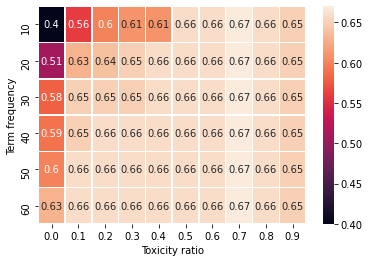

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

score = scores.pivot("Term frequency", "Toxicity ratio", "F1")
ax = sns.heatmap(score, annot=True, linewidths=.5)
plt.savefig('heatmap2.png', dpi=200)